# Explore Seed Persons Data

This notebook explores the `data/seed_persons.csv` file.

## Dataset Description
The `data/seed_persons.csv` file contains the initial "seed" population data used for the population synthesis process in ActivitySim/PopulationSim. This data is typically derived from the US Census Bureau's Public Use Microdata Sample (PUMS).

### Key Columns:
- **SERIALNO**: Housing unit/GQ serial number. Links persons to households.
- **SPORDER**: Person number within the household.
- **PUMA**: Public Use Microdata Area code (geographic unit).
- **ST**: State FIPS code.
- **AGEP**: Age of the person.
- **WAGP**: Wages or salary income past 12 months.
- **WKHP**: Usual hours worked per week past 12 months.
- **SCHL**: Educational attainment.
- **ESR**: Employment status recode.
- **PWGTP**: Person's weight.

This file serves as the disaggregate pool of persons from which the synthesizer draws to create a synthetic population that matches aggregate marginal controls.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/seed_persons.csv')
print(f"Data loaded. Shape: {df.shape}")

Data loaded. Shape: (11734, 236)


/var/folders/kn/3x821vdj65g70x4_c14d1rbc0000gn/T/ipykernel_38550/2229441786.py:1: DtypeWarning: Columns (219,221,225) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/seed_persons.csv')


In [3]:
df.head()

,RT,SERIALNO,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,COW,...,naicsp07,wgtp,employed,soc,OCCP,famTag,dupcount,OSUTAG,n,hhnum
0,P,2006000000530,1,600,41,1098342,43,35,1,1.0,...,N.A.////,42,1,29,2,1,1,0,1,1
1,P,2006000000530,2,600,41,1098342,46,8,1,NaN,...,NaN,42,0,0,999,1,1,0,1,1
2,P,2006000000530,3,600,41,1098342,45,5,1,NaN,...,NaN,42,0,0,999,1,1,0,1,1
3,P,2006000000530,4,600,41,1098342,42,47,1,6.0,...,N.A.////,42,1,41,4,1,1,0,1,1
4,P,2006000002056,1,600,41,1098342,17,66,1,NaN,...,NaN,18,0,0,999,0,1,0,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11734 entries, 0 to 11733
Columns: 236 entries, RT to hhnum
dtypes: float64(63), int64(164), object(9)
memory usage: 21.1+ MB


In [5]:
df.describe()

,SERIALNO,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,COW,ENG,...,PWGTP80,wgtp,employed,soc,OCCP,famTag,dupcount,OSUTAG,n,hhnum
count,1.173400e+04,11734.000000,11734.0,11734.0,1.173400e+04,11734.000000,11734.000000,11734.000000,7443.000000,857.000000,...,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000
mean,2.008040e+12,2.081814,600.0,41.0,1.043798e+06,19.393302,38.062383,1.209221,2.257826,1.522754,...,19.367223,15.852821,0.476905,16.275439,524.087353,0.793165,1.286859,0.109766,1.143429,2431.301347
std,1.429210e+09,1.269574,0.0,0.0,3.432828e+04,13.487521,22.686135,0.829923,1.917831,0.814448,...,17.075495,11.929581,0.499488,19.348235,497.402840,0.405053,0.452314,0.413962,0.350525,1410.886796
min,2.006000e+12,1.000000,600.0,41.0,1.007624e+06,1.000000,0.000000,1.000000,1.000000,1.000000,...,-7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2.007000e+12,1.000000,600.0,41.0,1.015979e+06,12.000000,19.000000,1.000000,1.000000,1.000000,...,7.000000,8.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,1196.250000
50%,2.008001e+12,2.000000,600.0,41.0,1.031272e+06,17.000000,37.000000,1.000000,1.000000,1.000000,...,15.000000,14.000000,0.000000,0.000000,999.000000,1.000000,1.000000,0.000000,1.000000,2451.000000
75%,2.009001e+12,3.000000,600.0,41.0,1.069212e+06,23.000000,56.000000,1.000000,3.000000,2.000000,...,26.000000,20.000000,1.000000,37.000000,999.000000,1.000000,2.000000,0.000000,1.000000,3658.000000
max,2.010001e+12,12.000000,600.0,41.0,1.098342e+06,132.000000,94.000000,5.000000,9.000000,4.000000,...,158.000000,118.000000,1.000000,55.000000,999.000000,1.000000,2.000000,2.000000,2.000000,4841.000000


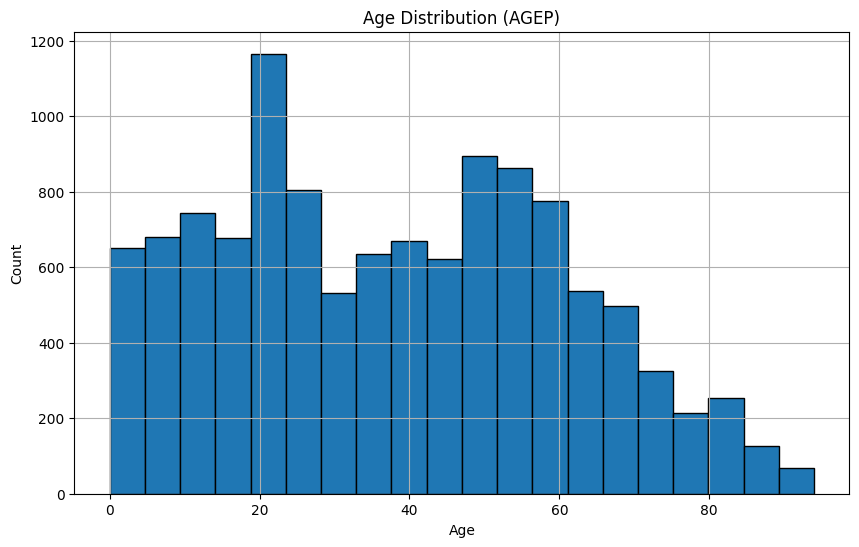

Average Age: 38.06


In [9]:
# Analyze Age Distribution
if 'AGEP' in df.columns:
    plt.figure(figsize=(10, 6))
    df['AGEP'].hist(bins=20, edgecolor='black')
    plt.title('Age Distribution (AGEP)')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
    print(f"Average Age: {df['AGEP'].mean():.2f}")

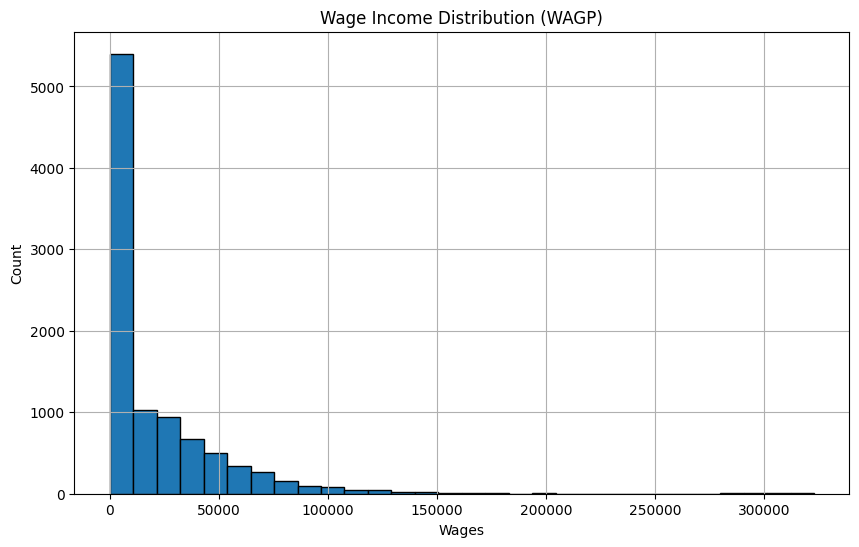

Median Wage (for earners): 24000.00


In [8]:
# Analyze Wage Income Distribution
if 'WAGP' in df.columns:
    plt.figure(figsize=(10, 6))
    # Filter out 0 wages for log view or just normal view
    df['WAGP'].hist(bins=30, edgecolor='black')
    plt.title('Wage Income Distribution (WAGP)')
    plt.xlabel('Wages')
    plt.ylabel('Count')
    plt.show()
    print(f"Median Wage (for earners): {df[df['WAGP'] > 0]['WAGP'].median():.2f}")

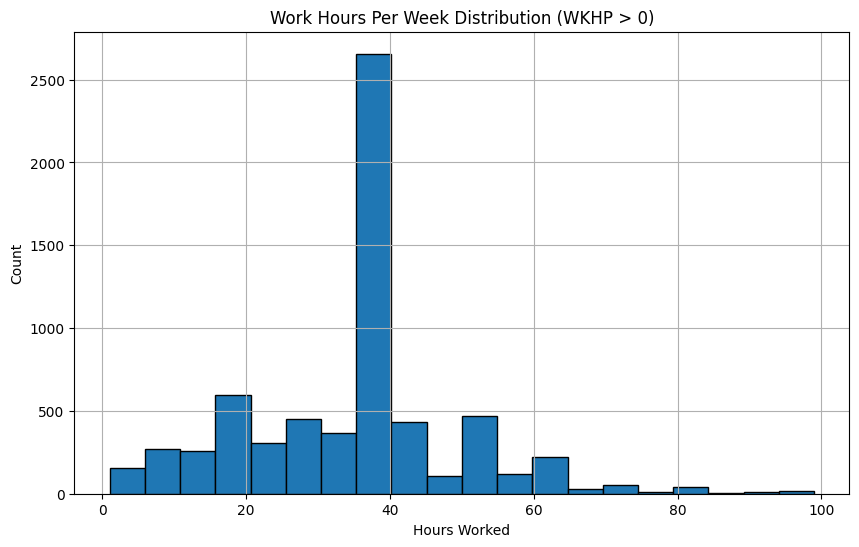

Average Work Hours (for workers): 36.05


In [10]:
# Analyze Work Hours Per Week (WKHP)
if 'WKHP' in df.columns:
    plt.figure(figsize=(10, 6))
    # Filter out NaNs if any, though PUMS usually uses -1 or similar for N/A. Let's check > 0 for working pop.
    working_pop = df[df['WKHP'] > 0]
    working_pop['WKHP'].hist(bins=20, edgecolor='black')
    plt.title('Work Hours Per Week Distribution (WKHP > 0)')
    plt.xlabel('Hours Worked')
    plt.ylabel('Count')
    plt.show()
    print(f"Average Work Hours (for workers): {working_pop['WKHP'].mean():.2f}")

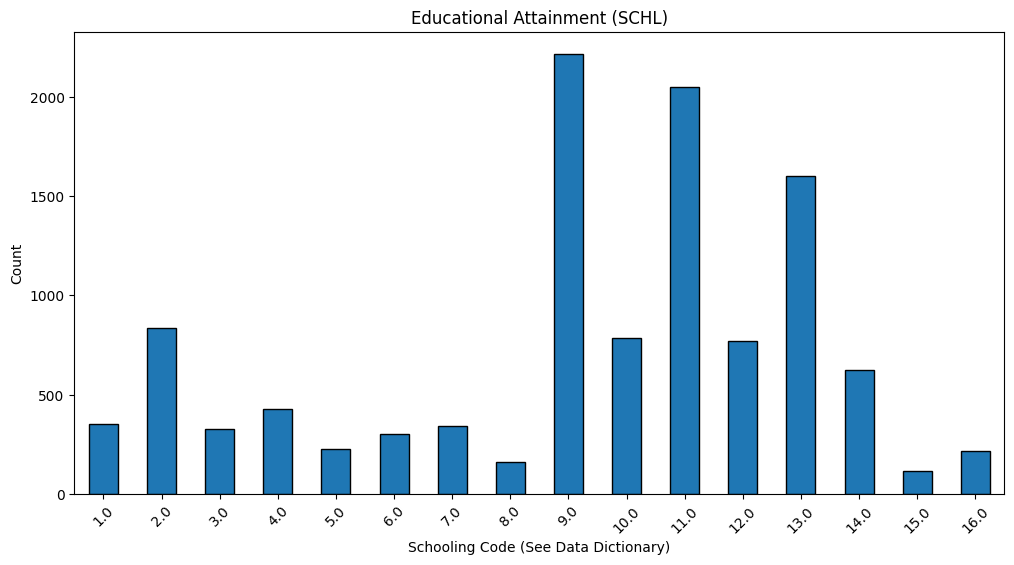

Top 5 Education Levels:
SCHL
9.0     2216
11.0    2052
13.0    1601
2.0      836
10.0     784
Name: count, dtype: int64


In [11]:
# Analyze Educational Attainment (SCHL)
if 'SCHL' in df.columns:
    plt.figure(figsize=(12, 6))
    df['SCHL'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
    plt.title('Educational Attainment (SCHL)')
    plt.xlabel('Schooling Code (See Data Dictionary)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    # Optional: Mapping codes to text if dictionary available, but raw codes for now
    print("Top 5 Education Levels:")
    print(df['SCHL'].value_counts().head())

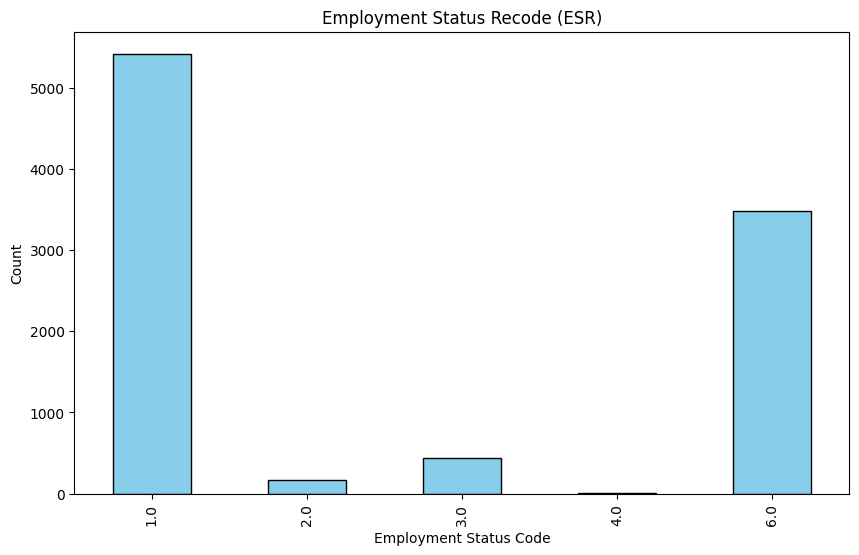

ESR
1.0    5417
6.0    3478
3.0     436
2.0     165
4.0      14
Name: count, dtype: int64


In [12]:
# Analyze Employment Status (ESR)
if 'ESR' in df.columns:
    plt.figure(figsize=(10, 6))
    # ESR Codes: 1=Employed, 2=Employed/Unpaid, 3=Unemployed, 6=Not in labor force, etc.
    df['ESR'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Employment Status Recode (ESR)')
    plt.xlabel('Employment Status Code')
    plt.ylabel('Count')
    plt.show()
    print(df['ESR'].value_counts())